# ¡Hola, Ilse!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_1 = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
df_2 = pd.read_csv('/datasets/products.csv', sep = ';')
df_3 = pd.read_csv('/datasets/aisles.csv', sep = ';')
df_4 = pd.read_csv('/datasets/departments.csv', sep = ';')
df_5 = pd.read_csv('/datasets/order_products.csv', sep = ';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

In [3]:
# mostrar información del DataFrame 1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame 2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame 3
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame 4
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame 5
df_5.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones
Al momento de imprimir la información de cada uno de los DataFrames, si solamente se leen los archivos sin ninguna instrucción adicional, se observa que cuentan con un formato diferente en donde el nombre de las columnas se reflejaba en una sola línea. Con el fin de evitar esta mala visualización, se agregó la instrucción correspondiente para indicar el separador entre cada columna.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho bien con esta exploración inicial de los datos.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Es indispensable primero verificar y corregir algunos tipos de datos para que éstos no afecten en el análisis de datos y por ende el resultado final. Primero hay que identificar los valores ausentes al igual que aquellos que se encuentren repetidos para decidir como procesarlos, es decir, si se deben de rellenar con valores None o simplemente eliminarlos. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print('Cantidad de duplicados en df_1:', df_1.duplicated().sum())
print()

print("Filas duplicadas:")
df_1_duplicates = df_1[df_1.duplicated()]
print(df_1_duplicates.reset_index())

Cantidad de duplicados en df_1: 15

Filas duplicadas:
     index  order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   145574    794638    50898            24          3                  2   
1   223105   2160484   107525            16          3                  2   
2   230807   1918001   188546            14          3                  2   
3   266232   1782114   106752             1          3                  2   
4   273805   1112182   202304            84          3                  2   
5   284038   2845099    31189            11          3                  2   
6   311713   1021560    53767             3          3                  2   
7   321100    408114    68324             4          3                  2   
8   323900   1919531   191501            32          3                  2   
9   345917   2232988    82565             1          3                  2   
10  371905    391768    57671            19          3                  2   
11  394347    467134  

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? Todas las ordenes se hicieron el miercoles a las 2am.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles_2am = df_1[(df_1['order_dow'] == 3) & (df_1['order_hour_of_day'] == 2)]

print("Pedidos realizados el miércoles a las 2:00 a.m.:")
print(pedidos_miercoles_2am.reset_index())

Pedidos realizados el miércoles a las 2:00 a.m.:
      index  order_id  user_id  order_number  order_dow  order_hour_of_day  \
0      4838   2766110   162084            41          3                  2   
1      5156   2190225   138285            18          3                  2   
2     15506    553049    58599            13          3                  2   
3     18420    382357   120200            19          3                  2   
4     24691    690242    77357             2          3                  2   
..      ...       ...      ...           ...        ...                ...   
116  457013   3384021    14881             6          3                  2   
117  458816    910166   164782            18          3                  2   
118  459635   1680532   106435             6          3                  2   
119  468324    222962    54979            59          3                  2   
120  477526   2592344    46860            38          3                  2   

     days_sinc

¿Qué sugiere este resultado? Que del total de 121 columnas con esta caracterisitca, 15 estan repetidas. 

In [10]:
# Eliminar los pedidos duplicados
df_1_sin_duplicados = df_1.drop_duplicates().reset_index(drop = True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
cantidad_duplicados_despues = df_1_sin_duplicados.duplicated().sum()
print("Cantidad de filas duplicadas después de eliminarlas:", cantidad_duplicados_despues)

Cantidad de filas duplicadas después de eliminarlas: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
ids_duplicados = df_1_sin_duplicados['order_id'].duplicated().sum()

print("Cantidad de IDs duplicados de pedidos:", ids_duplicados)

Cantidad de IDs duplicados de pedidos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Durante el proceso se observo que dentro del DataFrame de las órdenes, había en total 15 líneas duplicadas las cuales compartían la caracterísitca de haber sido hechas los miércoles a las 2 am. Es por eso que se realizó un filtro total del DataFrame para filtrar esta condición y removerla con el fin de que ya no existieran duplicados. Adedmás cabe destacar que el hecho de haber buscado si había duplicados por ID, es una forma de nuevamente filtrar si hay más órdenes repetidas por usuario.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Cantidad de duplicados en df_2:', df_2.duplicated().sum())

Cantidad de duplicados en df_2: 0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
ids_departamentos_duplicados = df_2['department_id'].duplicated().sum()
print('Cantidad de IDs duplicados en departamentos:', ids_departamentos_duplicados)

Cantidad de IDs duplicados en departamentos: 49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_2['product_name'] = df_2['product_name'].str.upper()

cant_nombres_productos_duplicados = df_2['product_name'].duplicated().sum() 
print('Cantidad de nombres productos duplicados:', cant_nombres_productos_duplicados)

Cantidad de nombres productos duplicados: 1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
total_none_duplicados = df_2['product_name'].isna().duplicated().sum()
print('total NaN duplicados en columna product name: ', total_none_duplicados, '\n') #verificar cuantos NaN hay duplicados

nombres_duplicados_no_faltantes = df_2[(~df_2['product_name'].isna()).duplicated()] 
cuantos_nombres_no_faltantes_duplicados = (~df_2['product_name'].isna()).duplicated().sum() 
#adentro del () esta el df de productos que NO son none y fuera vemos el df de los que tienen otro valor que estan duplicados
print(nombres_duplicados_no_faltantes)
print(cuantos_nombres_no_faltantes_duplicados)

#Lo que te piden es descartar que el motivo de los nombres duplicados, sea porque el nombre del producto esté ausente, es decir NaN

total NaN duplicados en columna product name:  49692 

       product_id                                       product_name  \
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               5                          GREEN CHILE ANYTIME SAUCE   
5               6                                       DRY NOSE OIL   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
1           104             13  
2            9

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame de los productos se observa que de los 1361 nombres de productos reptidos en realidad éstos son en total 104 mientras que el resto corresponde a datos sin alguna información. A pesar de que estos 104 sean productos con el mismo nombre pueden corresponder a diferentes departamentos por lo que es necesario verificar si estos productos son diferentes o si se deberían de acomodar en uno mismo departamento para que no existan duplicados. 

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_4_duplicados = df_4.duplicated().sum()
print('Cantidad de filas duplicadas en departmentos:', df_4_duplicados)

Cantidad de filas duplicadas en departmentos: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
df_4_ids_duplicados = df_4['department_id'].duplicated().sum()
print('Cantidad de ids duplicados de los departamentos:', df_4_ids_duplicados)

Cantidad de ids duplicados de los departamentos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En ambos casos, nos muestra que en este DataFrame no existen casos de información duplicada, es decir, que el numero de id de cada departamento es único y en total son 21 de acuerdo con la información adquirida previamente con df_4.info(). 

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_3_duplicados = df_3.duplicated().sum()
print('Cantidad de filas duplicadas en aisles:', df_3_duplicados)

Cantidad de filas duplicadas en aisles: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
df_3_ids_duplicados = df_3['aisle_id'].duplicated().sum()
print('Cantidad de ids duplicados en aisles:', df_3_ids_duplicados)

Cantidad de ids duplicados en aisles: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En ambos casos, nos muestra que en este DataFrame no existen casos de información duplicada, es decir, que el numero de id de cada pasillo es único y en total son 134 de acuerdo con la información adquirida previamente con df_3.info(). 

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_5_duplicados = df_5.duplicated().sum()
print('Cantidad de ordenes de productos duplicadas:', df_5_duplicados)

Cantidad de ordenes de productos duplicadas: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicados_engañosos = df_5.duplicated(subset=['order_id', 'product_id']).any()

if duplicados_engañosos:
    print("Hay duplicados engañosos en el DataFrame.")
else:
    print("No hay duplicados engañosos en el DataFrame.")


No hay duplicados engañosos en el DataFrame.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Con la información obtenida, se observa que si df_5_duplicados es mayor que cero, significa que hay filas totalmente duplicadas en el DataFrame y que si duplicados_engañosos es True, significa que hay duplicados engañosos en el DataFrame. En ambos casos el resultado obtenido es que no se repiten datos en alguna de las filas de este dataframe.
Estos pasos son importantes para garantizar la integridad de los datos y evitar contar múltiples veces los mismos pedidos o productos en análisis posteriores.


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
df_2_ausentes = df_2['product_name'].isna().sum()
print('Cantidad de valores ausentes en columna product_name:',df_2_ausentes)

Cantidad de valores ausentes en columna product_name: 1258


Describe brevemente cuáles son tus hallazgos. 

Que en el DataFrame df_2 correspondiente a los productos, hay en total 1258 que son valores NaN y probablemente también estén interfiriendo con aquellos que estén duplicados en la misma columna. 

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? 
cantidad_productos_ausentes_no_pasillo_100 = ((df_2['product_name'].isna()) & (df_2['aisle_id'] != 100)).sum()
print('La cantidad de productos austentes en el pasillo 100 son: ',cantidad_productos_ausentes_no_pasillo_100)

La cantidad de productos austentes en el pasillo 100 son:  0


Describe brevemente cuáles son tus hallazgos.

No existe algun producto NaN en el pasillo con el Id 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
cantidad_productos_ausentes_no_departamento_21 = ((df_2['product_name'].isna()) & (df_2['department_id'] != 21)).sum()
print('La cantidad de productos austentes en el departamento con id 21 son: ',cantidad_productos_ausentes_no_departamento_21)

La cantidad de productos austentes en el departamento con id 21 son:  0


Describe brevemente cuáles son tus hallazgos.

No existe algun prodcuto NaN en el departamento con id 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_3_pasillo_100 = df_3[df_3['aisle_id'] == 100]
print('Informacion pasillo id 100: \n ',df_3_pasillo_100, '\n')

df_4_pdedpartamento_21 = df_4[df_4['department_id'] == 21]
print('Informacion departamento id 21: \n ',df_4_pdedpartamento_21, '\n')

Informacion pasillo id 100: 
      aisle_id    aisle
99       100  missing 

Informacion departamento id 21: 
      department_id department
20             21    missing 



Describe brevemente cuáles son tus hallazgos.

El estado de ambos es missing, es decir, tanto del aisle_id como del departement_id no se encuentran.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_2['product_name'] = df_2['product_name'].fillna('Unknown')
print(df_2['product_name'])
print('Cantidad NaN en columna product name: ',df_2['product_name'].isna().sum())

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object
Cantidad NaN en columna product name:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Es importante que aunque el sistema solo reconoce valores ausentes como NaN o None, verificar si las filas no tiene alguna palabra similar en la que demuestre que hace falta el dato. 

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_1_valores_ausentes = df_1.isna().sum()
print(df_1_valores_ausentes)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
val_ausente_diferente_primero = df_1[(df_1['days_since_prior_order'] != 1.0) & df_1.isnull().any(axis=1)]
print(val_ausente_diferente_primero)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todos los valores ausentes del DataFrame 1 que corresponde a las ordenes, son principalmente de la columna days_since_prior_order y son despues del primer pedido del cliente. 

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_5_ausentes = df_5.isna().sum()
print(df_5_ausentes)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
val_maximo_add_cart = df_5['add_to_cart_order'].max()
val_minimo_add_cart = df_5['add_to_cart_order'].min()

print('Valor maximo: ', val_maximo_add_cart)
print('Valor minimo: ', val_minimo_add_cart)


Valor maximo:  64.0
Valor minimo:  1.0


Describe brevemente cuáles son tus hallazgos.

El maximo de pedidos que ha hecho un cliente mientras que el minimo es de al menos 1. 

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_pedidos_con_valor_ausente = df_5[df_5['add_to_cart_order'].isnull()]['order_id'].reset_index(drop = True)

print("IDs de pedidos con valor ausente en 'add_to_cart_order': \n", ids_pedidos_con_valor_ausente)

IDs de pedidos con valor ausente en 'add_to_cart_order': 
 0      2449164
1      1968313
2      2926893
3      1717990
4      1959075
        ...   
831    1800005
832    1633337
833     404157
834    1673227
835    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

# filtro del DataFrame df_5 para conservar solo los IDs de pedido en ids_pedidos_con_valor_ausente
df_filtrado = df_5[df_5['order_id'].isin(ids_pedidos_con_valor_ausente)]

# Agrupa por order_id, accede a product_id y cuenta con count
conteo_productos_por_pedido_filtrado = df_filtrado.groupby('order_id')['product_id'].count()
# Se revisa el valor mínimo del conteo
min_conteo = conteo_productos_por_pedido_filtrado.min()

# Imprime el resultado
print("El valor mínimo del conteo de 'product_id' en pedidos con datos ausentes es:", min_conteo)

El valor mínimo del conteo de 'product_id' en pedidos con datos ausentes es: 65


Describe brevemente cuáles son tus hallazgos.

Se puede concluir que todos los pedidos con valores ausentes en 'add_to_cart_order' tienen al menos 65 productos. Esto sugiere que estos pedidos pueden ser pedidos grandes o que pueden haber ocurrido algunos errores en el registro de datos, ya que es poco común tener tantos productos en un solo pedido.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_5['add_to_cart_order'] = df_5['add_to_cart_order'].fillna(999)
df_5['add_to_cart_order'] = df_5['add_to_cart_order'].astype(int)

print(df_5.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se identificaron pedidos con datos ausentes en la columna 'add_to_cart_order' en el DataFrame df_5. Se reemplazaron los valores ausentes con el valor 999 y luego se convirtió la columna al tipo entero para asegurar la consistencia de los datos y permitir su análisis posterior. Con esta acción tomanda, los valores ausentes fueron reemplazados con éxito, lo que garantiza que todos los datos estén completos y en el formato adecuado para un análisis más detallado. Esto ayuda a evitar problemas al procesar los datos y facilita su interpretación.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Definitivamente lso DataFrames df_1, df_2 y df_5 fueron los que tuvieron más errores de duplicados y de valores NaN a lo largo de todo el preprocesamiento de datos. Este paso es esencial para limpiar los datos para el análisis posterior ya que si en éste incluimos datos inconclusos será lo mismo para el resultado. La mayoría de estos datos duplicados se debían a órdenes que el usuario había hecho más de una vez y que fueron registradas con el mismo nombre y día de creación por lo que una supuesta solución sería darle mantenimiento a la página de órdenes para saber que error en la programación es la que esta ocasionando esto. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
# Verificar si los valores en las columnas 'order_hour_of_day' y 'order_dow' son razonables
valores_razonables_order_hour_of_day = df_1['order_hour_of_day'].between(0, 23)
print('Valores order hour of day: \n', valores_razonables_order_hour_of_day)


Valores order hour of day: 
 0         True
1         True
2         True
3         True
4         True
          ... 
478962    True
478963    True
478964    True
478965    True
478966    True
Name: order_hour_of_day, Length: 478967, dtype: bool


In [36]:
valores_razonables_order_dow = df_1['order_dow'].between(0, 6)
print('Valores order dow: \n', valores_razonables_order_dow)

Valores order dow: 
 0         True
1         True
2         True
3         True
4         True
          ... 
478962    True
478963    True
478964    True
478965    True
478966    True
Name: order_dow, Length: 478967, dtype: bool


Escribe aquí tus conclusiones: Tanto en la columna order_hour_of_day como en la columna order_dow se reseptan los intervalos propuestos en la descripcion es decir que se hace dentro de las 24 horas y en cualquiera de los 7 dias de la semana la orden del usuario. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

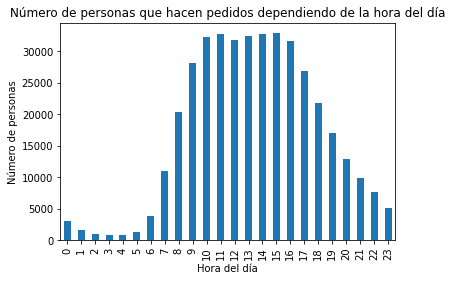

In [37]:
#número de personas que hacen pedidos dependiendo de la hora del día

# Contar el número de personas que hacen pedidos para cada hora del día
num_personas_por_hora = df_1.groupby('order_hour_of_day')['user_id'].nunique() #cuenta id unicos solamente

# Trazar un gráfico de barras para mostrar el número de personas que hacen pedidos en función de la hora del día
num_personas_por_hora.plot(kind='bar', 
                           title='Número de personas que hacen pedidos dependiendo de la hora del día',
                           xlabel='Hora del día', 
                           ylabel='Número de personas')

plt.show()

Escribe aquí tus conclusiones: Las horas donde las personas hacen por lo general sus pedidos es en ranfo de las 10 am hasta las 4 pm. 

### [A3] ¿Qué día de la semana compran víveres las personas?

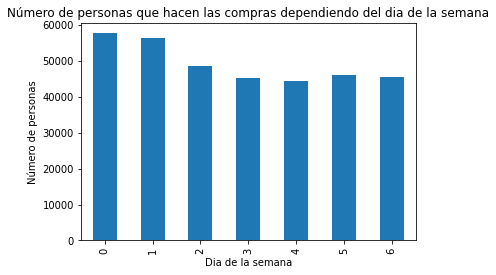

In [38]:
#día de la semana la gente hace sus compras

# Contar el número de personas que hacen pedidos para cada dia de la semana
num_personas_por_hora = df_1.groupby('order_dow')['user_id'].nunique() #cuenta id unicos solamente

# Trazar un gráfico de barras para mostrar el número de personas que hacen pedidos en función del dia de la semana
num_personas_por_hora.plot(kind='bar', 
                           title='Número de personas que hacen las compras dependiendo del dia de la semana',
                           xlabel='Dia de la semana', 
                           ylabel='Número de personas')

plt.show()

Escribe aquí tus conclusiones: Al parecer Domingo (0) y Lunes (1) son aquellos días donde mayor número de personas son las que compran. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

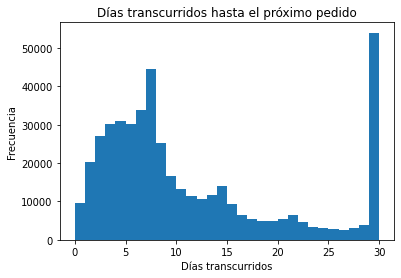

Valor mínimo de días transcurridos: 0.0
Valor máximo de días transcurridos: 30.0


In [39]:
# Calcular los días transcurridos desde el pedido anterior para cada pedido
dias_transcurridos = df_1['days_since_prior_order']

# Trazar un histograma para mostrar la distribución de los días transcurridos
plt.hist(dias_transcurridos, bins=30) #bins 30 porque en un mes son 30 dias

plt.title('Días transcurridos hasta el próximo pedido')
plt.xlabel('Días transcurridos')
plt.ylabel('Frecuencia') #El eje Y representa la frecuencia de ocurrencia para cada valor
#plt.grid(True)
plt.show()

# Imprimir información sobre los valores mínimos y máximos
print("Valor mínimo de días transcurridos:", dias_transcurridos.min())
print("Valor máximo de días transcurridos:", dias_transcurridos.max())

Escribe aquí tus conclusiones: Dado los valores mínimo y máximo de la distribución anterior, se puede responder a la pregunta anterior que los usuarios se toman entre 0 días hasta un mes entero para realizar su siguiente orden. Esto mismo también se refleja en la gráfica proporcionada anteriormente. Sumado a esto cabe recalcar que los usuarios tienden a ordenar más los días Domingo y Lunes entre las 10 am hasta las 4 pm.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección `A`.
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

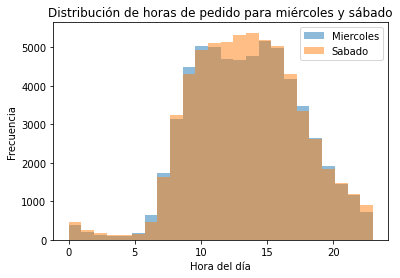

In [40]:
#domingo 0 lunes 1 martes 2 miercoles 3 jueves 4 viernes 5 sabado 6

# esto mostrará el gráfico de order_hour_of_day de los miercoles con numero 3
df_1[df_1['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.5) #bins 24 porque son 24 hrs al dia

# esto mostrará el gráfico de order_hour_of_day de los sabados con numero 6
# e incluye un valor alpha para que podamos ver ambos histogramas por completo
df_1[df_1['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.5)

plt.title('Distribución de horas de pedido para miércoles y sábado')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')

plt.legend(['Miercoles', 'Sabado']) # leyenda, que sigue el mismo orden trazado anteriormente
plt.show() 

Escribe aquí tus conclusiones: De acuerdo con el gráfico anterior se puede notar que hay una mayor frecuencia por parte de los usuarios en realizar pedidos los Sábados entre las 10 am y las 3pm más que los Miércoles. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

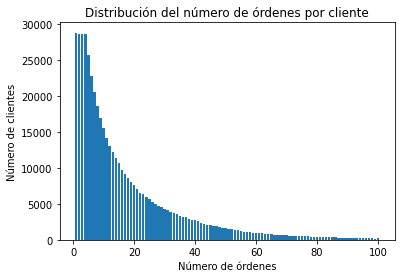

In [41]:
#Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...)
# Contar cuántas veces aparece cada valor único en la columna 'order_number' - número de veces que este cliente ha hecho un pedido
distribucion_ordenes = df_1['order_number'].value_counts()

# Trazar un gráfico de barras para visualizar la distribución del número de órdenes por cliente
#distribucion_ordenes.plot(kind='bar')
plt.bar(distribucion_ordenes.index, distribucion_ordenes.values) #visualmente es mejor porque si no se amontonaban las ordenes en eje x

# Agregar etiquetas y título
plt.title('Distribución del número de órdenes por cliente')
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')

plt.show()

Escribe aquí tus conclusiones: De acuerdo con el resultado de la gráfica anterior, se puede observar que hay mayor número de clientes cuando hacen órdenes de menor número. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
#¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

#primero hacer un merge entre los product_id y sus respectivos nombres, esta informacion esta separada entre el df_2 y el df_5
#en el df_2 correspondiente a products.csv estan los nombres en product_name y el id mientras que en el df_5 esta solo el id

#Realizar el merge entre df_5 y df_2
df_merged = pd.merge(df_5, df_2[['product_id', 'product_name']], on='product_id', how='inner')

# contamos el número de veces que aparece cada producto en la columna 'product_id' y seleccionamos solo 20 
productos_populares = df_merged['product_id'].value_counts().head(20)

# df de productos mas populares
df_productos_populares = pd.DataFrame({'product_id': productos_populares.index})

# Con merge juntamos el DataFrame de los productos mas populares con el DataFrame original para obtener los nombres de los productos
nombres_productos_populares = pd.merge(df_productos_populares, df_merged[['product_id', 'product_name']], on='product_id').drop_duplicates()

# Grafico de barras para mostrar los 20 productos más populares
productos_populares.plot(kind='bar', title='Los 20 productos más populares', xlabel='ID de producto', ylabel='Número de veces que aparece')
plt.show()


In [ ]:
# Se imprimen los nombres y los IDs de los productos mas populares - es el merge entre los dos df's anteriores
print("Los 20 productos más populares:")
print(nombres_productos_populares)

Escribe aquí tus conclusiones: En el gráfico observamos que la frecuencia de los 20 prodcutos más populares es de 1 correspondiente al total. Además en el DataFrame impreso se observan los productos junto con su id correspondiente como se muestra en la gráfica.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
#esta informacion se saca de order_products que es el df_5
# promedio de articulos por pedido por orden de id
promedio_articulos_por_pedido = df_5.groupby('order_id')['product_id'].count().mean()
promedio_articulos_por_pedido = promedio_articulos_por_pedido.astype(int)

# histograma para visualizar la distribucion del numero de articulos por pedido
plt.hist(df_5.groupby('order_id')['product_id'].count(), bins=50)

plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

print("Cantidad promedia de artículos que compran las personas por pedido:", promedio_articulos_por_pedido)

Escribe aquí tus conclusiones: De acuerdo con la gráfica mostrada vemos que la mayor parte de los picos se encuentran en el intervalo de 1 a 20 artículos por pedido. Con el promedio obtenido, se puede determinar que como mínimo el usuario puede llegar a comprar hasta 10 artículos por orden. De hecho esta la tendencia de que por orden la cantidad de artículos es la menor posible.   

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
#Para esto entiendo que hay que hacer un merge entre los DataFrames df_2 que corresponde a products y df_5 que corresponde a order products
#Esto porque df_2 que corresponde a products.csv y el df_5 que corresponde a order_products.csv si lo que quiero es que se combine el product id con product_name para despues obtener los nombres de los productos que mas se han reordenado

#Realizar el merge entre df_5 y df_2
df_merged = pd.merge(df_5, df_2[['product_id', 'product_name']], on='product_id', how='inner')

#Agrupar por product_id y product_name y sumar la columna reordered
productos_reordenados = df_merged.groupby(['product_id', 'product_name'])['reordered'].sum().reset_index()

#Ordenar los productos en funcion del numero de veces que se han reordenado de manera descendente - mas alto al mas bajo
productos_reordenados = productos_reordenados.sort_values(by='reordered', ascending=False)

#20 productos más reordenados
top_20_productos_reordenados = productos_reordenados.head(20)

In [ ]:
# Paso 5: Graficar los 20 principales artículos reordenados
plt.figure(figsize=(10, 6))
plt.bar(top_20_productos_reordenados['product_name'], top_20_productos_reordenados['reordered'])
plt.title('20 principales artículos que se vuelven a pedir con mayor frecuencia')
plt.xlabel('Nombre del producto')
plt.ylabel('Número de veces reordenado')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Imprimir los nombres e IDs de los 20 principales artículos reordenados
print("Los 20 principales artículos que se vuelven a pedir con mayor frecuencia:")
print(top_20_productos_reordenados)

Escribe aquí tus conclusiones: Esta información es muy valiosa ya que se puede ver claramente cuales son las preferencias que tienen el cliente y de esta manera avisar a los proveedores con que artículos contar más para abastecer a mayor número de clientes. Este básicamente sería el punto fuerte del negocio porque es lo que más se demanda. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
# Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
# Agrupar los datos por product_id
grupo_productos = df_5.groupby('product_id')

#Contar el número total de pedidos para cada producto
total_pedidos_por_producto = grupo_productos['order_id'].nunique()

#Contar el número total de repeticiones de pedido para cada producto
total_repeticiones_por_producto = grupo_productos['reordered'].sum()

# Paso 4: Calcular la tasa de repetición del pedido para cada producto
tasa_repeticion_por_producto = total_repeticiones_por_producto / total_pedidos_por_producto

# Mostrar las tasas de repetición del pedido para cada producto
print(tasa_repeticion_por_producto)

Escribe aquí tus conclusiones: Con esta información presentada, podemos definir que en cuanto mayor sea la tasa de repeticion por producto, es decir que se aproxime al 1, se puede definir cual de todos los productos enlistados son los que tienen mayor popularidad en el mercado. Esto va mucho de la mano con el análisis del problema anterior ya que con estos dos se pueden realizar estrategias de marketing para que aquellos productos con tasas bajas darles seguimiento del porque no estan siendo tan consumidos por los usuarios. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
# Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
#Es necesario hacer un merge entre el df_1 y df_5 combine el user_id con order_id para despues obtener para cada cliente la proporción de sus productos ya los había pedido      

#Realizar el merge entre df_1 y df_5
df_merged = pd.merge(df_1, df_5, on='order_id', how='inner')

#Agrupar los datos por user_id y order_id
grupo_clientes_pedidos = df_merged.groupby(['user_id', 'order_id'])

#Calcular el número total de productos distintos que cada cliente ha pedido
total_productos_distintos_por_cliente = grupo_clientes_pedidos['product_id'].nunique().reset_index()

#Calcular el número total de productos que cada cliente ha vuelto a pedir
total_productos_repetidos_por_cliente = grupo_clientes_pedidos['reordered'].sum().reset_index()

#Calcular la proporción de productos que cada cliente ha vuelto a pedir en comparación con el número total de productos distintos que ha pedido
proporcion_productos_repetidos_por_cliente = total_productos_repetidos_por_cliente.merge(total_productos_distintos_por_cliente, on=['user_id', 'order_id'])
proporcion_productos_repetidos_por_cliente['proporcion_repetidos'] = proporcion_productos_repetidos_por_cliente['reordered'] / proporcion_productos_repetidos_por_cliente['product_id']

# Mostrar la proporción de productos repetidos por cliente
print(proporcion_productos_repetidos_por_cliente)

Escribe aquí tus conclusiones: Como ya se había mencionado anteriormente, entre más cercana sea la tasa a 1 se puede definir que productos son los de mayor interés para un usuario en específico. Esta información ayuda a saber que es lo que se le puede ofrecer como nuevos prodcutos a cada usuario en relación con el tipo de productos que compra. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
#¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?
#Merge entre df_2 y df_5 porque df_2 que corresponde a products.csv y el df_5 que corresponde a order_products.csv si lo que quiero es que se combine el product id con product_name para despues obtener los 20 principales artículos que las personas ponen primero en sus carritos.

#Merge entre df_2 y df_5
df_merged = pd.merge(df_2, df_5, on='product_id', how='inner')

#Filtrar los datos para incluir solo los productos añadidos primero al carrito
df_first_cart = df_merged[df_merged['add_to_cart_order'] == 1]

#Agrupar los datos por product_id y contar el número de veces que cada producto se añadió primero al carrito
productos_primer_carrito = df_first_cart.groupby('product_id').size().reset_index(name='count')

#Ordenar los resultados por el recuento en orden descendente y seleccionar los 20 primeros productos
top_20_productos_primer_carrito = productos_primer_carrito.sort_values(by='count', ascending=False).head(20)

#Realizar un merge con df_2 para obtener los nombres de los productos
top_20_productos_primer_carrito_con_nombres = pd.merge(top_20_productos_primer_carrito, df_2, on='product_id', how='left')

# Mostrar los 20 principales productos que se ponen primero en los carritos con IDs, nombres y número de veces que fueron el primer artículo
print(top_20_productos_primer_carrito_con_nombres[['product_id', 'product_name', 'count']])

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta sección `C`.
</div>

Escribe aquí tus conclusiones: Con base en la información previa, es importante comprender los 20 principales artículos que la gente pone primero en sus carritos, las empresas pueden adaptar sus estrategias de marketing y gestión de inventario para satisfacer las necesidades y preferencias de los clientes de manera más efectiva, lo que puede conducir a una mejor experiencia de compra y mayores ventas.

### Conclusion general del proyecto:

In [ ]:
print('Después de un análisis exhaustivo de las preferencias de los usuarios basado en el primer producto agregado a sus carritos, se identificaron claramente los productos más populares. Esta información es crucial para desarrollar estrategias de marketing más efectivas y optimizar el inventario para satisfacer las demandas de los clientes. Utilizar datos para comprender las preferencias de los clientes es fundamental para aumentar la satisfacción de los clientes y mejorar el rendimiento general de este negocio. ')

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo, Ilse. Nos quedan solo algunos elementos por corregir. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nos queda solo un elemento por corregir.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>